Use the *freq* method to estimate a white dwarf age 
==========================================

In this tutotial we will estima the age of two white dwarfs using the *freq* method in *wdwarfdate*. We will start by importing the packages we need.

In [1]:
import sys
sys.path.append('/Users/rociokiman/Documents/wdwarfdate')
import wdwarfdate  
import numpy as np
import time

Then we set up the effective temperatures and surface gravity that *wdwarfdate* needs to run.

In [2]:
#Define data for the white dwarf
teffs = np.array([19250,20250])
teffs_err = np.array([500,850])
loggs = np.array([8.16,8.526])
loggs_err = np.array([0.084,0.126])

Now we run the age estimation using the *freq* method. 

In [3]:
start = time.time()
results = wdwarfdate.calc_wd_age(teffs,teffs_err,loggs,loggs_err,
                                 method='freq',
                                 model_wd='DA',feh='p0.00',vvcrit='0.0',
                                 model_ifmr = 'Cummings_2018_MIST', 
                                 high_perc = 84, low_perc = 16,
                                 datatype='Gyr',
                                 path='results/',
                                 return_distributions=True)
end = time.time()
print('{}s'.format(end - start))

0.28371500968933105s


/Users/rociokiman/Documents/wdwarfdate/wdwarfdate/wdwarfdate.py:226: RuntimeWarning: invalid value encountered in greater
  mask = np.logical_or(np.logical_or(ms_age_dist/1e9 > 13.8,
/Users/rociokiman/Documents/wdwarfdate/wdwarfdate/wdwarfdate.py:227: RuntimeWarning: invalid value encountered in greater
  total_age_dist/1e9 > 13.8),


We explicitly added the models we wanted to use. These are the standard models so we did not need to select these, but we wrote them down to be clear. We can see that the *freq* method takes a few seconds to run two white dwarfs. Let's take a look to see how the results looks like:

In [4]:
results

final_mass_median,final_mass_err_high,final_mass_err_low,initial_mass_median,initial_mass_err_high,initial_mass_err_low,cooling_age_median,cooling_age_err_high,cooling_age_err_low,ms_age_median,ms_age_err_high,ms_age_err_low,total_age_median,total_age_err_high,total_age_err_low,final_mass_dist [2000],initial_mass_dist [2000],cooling_age_dist [2000],ms_age_dist [2000],total_age_dist [2000]
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.7152565648700876,0.05465009564307832,0.04949439944761369,2.828207060876095,0.30498363705527387,0.6186799930951712,0.10928932783269371,0.025090022211050722,0.018366314275263806,0.5389842415402597,0.5651653015715528,0.13122382249508258,0.6528234334010605,0.5467933433007921,0.1129147464626944,0.787588976371989 .. 0.6832643554718084,3.2277485367486047 .. 2.428304443397605,0.13405474485200808 .. 0.11658497444910074,0.37184549927247096 .. 0.8503831263936328,0.5059002441244791 .. 0.9669681008427335
0.9451978739099629,0.07579295522494256,0.07676329863848752,4.431755830934233,0.7083453759340435,0.7174140059671728,0.19661768936844334,0.06383874254874286,0.047143873609377746,0.15665625090420376,0.09350527228484262,0.04850574277553357,0.37220285130101005,0.05106460996352569,0.03301294374606012,0.9058797212270558 .. 0.8358238781715375,4.064296460065942 .. 3.4856891880830885,0.1586301563033396 .. 0.1525671067283692,0.1963406461720172 .. 0.29820889003491063,0.35497080247535684 .. 0.4507759967632798


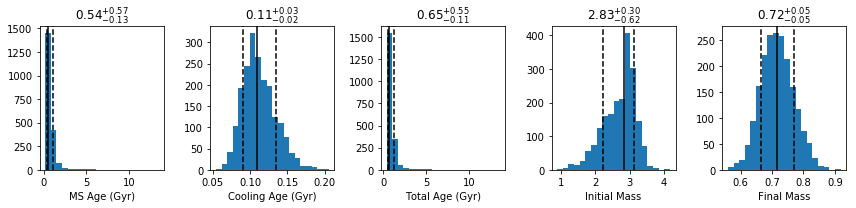

In [6]:
wdwarfdate.plot_distributions(teffs, loggs, 
                              *results['ms_age_dist','cooling_age_dist','total_age_dist','initial_mass_dist','final_mass_dist'][0], 
                              datatype ='Gyr',high_perc=84, low_perc=16)